# Análise de gastos militares

Uma análise rápida e criteriosa dos gastos militares dos países.

<center><img src="https://images.unsplash.com/photo-1580922110301-a666f6745565?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80" height="300"></center>

As guerras fazem parte da história da humanidade, sendo registradas e estudadas desde a antiguidade.

As guerras são conflitos armados que acontecem por diversos motivos, como divergências religiosas, interesses políticos e econômicos, disputas territoriais, rivalidades étnicas, entre outros motivos.

Infelizmente, o mundo está vivendo novamente esta parte terrível da história com o atual conflito entre a Rússia e a Ucrânia e essa foi a motivação deste trabalho: **Analisar os gastos militares/defesa do país.**

Através dos dados, tentaremos saber como os países estão agindo de acordo com os seus gastos militares e compará-los, a fim de obter informações e insights sobre este tema que voltou a surgir este ano. Vamos!



## Conjunto de Dados

Os dados foram coletados das seguintes fontes: [ourworldindata](https://ourworldindata.org/) e [worldbank](https://data.worldbank.org/).

**Os bancos de dados Ourworldindata contêm informações sobre os gastos militares dos países, até 2020.**

**As bases de dados do Banco Mundial contêm informações sobre as populações e o PIB dos países, até 2020.**

Extraído integralmente do [github](https://github.com/vitorbeltrao).

In [1]:
!pip install --upgrade xlrd

In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# Transforme arquivo csv em um dataframe do pandas - Nosso mundo em dados
df_expedinture_total = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/MilitaryExpenditure/main/data/military-expenditure-total.csv")

# Transforme arquivos Excel em um dataframe do Pandas - Banco Mundial
df_country_gdp = pd.read_excel("https://github.com/vitorbeltrao/MilitaryExpenditure/blob/main/data/API_NY.GDP.MKTP.CD_DS2_en_excel_v2_3158925.xls?raw=true")
df_country_population = pd.read_excel("https://github.com/vitorbeltrao/MilitaryExpenditure/blob/main/data/API_SP.POP.TOTL_DS2_en_excel_v2_3158861.xls?raw=true")

In [4]:
# # Entradas do conjunto de dados de despesas totais
# df_expedinture_total.head()

In [5]:
# # Entradas de países PIB
# df_country_gdp.head()

In [6]:
# # Entradas da população dos países
# df_country_population.head()

## Engenharia de dados

Antes de realmente iniciarmos a nossa análise, vamos concatenar o nosso conjunto de dados worldindata que contém as informações das despesas totais de cada país, com os conjuntos de dados do banco mundial que contêm as informações sobre as populações e o PIB dos países.

In [7]:
# Remova colunas indesejadas do conjunto de dados populacionais
df_country_population = df_country_population.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

# Renomeie a coluna "Country_Name" para "Entidade" do conjunto de dados populacionais
df_country_population.rename(columns={'Country Name': 'Entity'}, inplace = True)

# Verifique as 05 primeiras entradas do conjunto de dados populacionais
# df_country_population.head()

In [12]:
# Remova colunas indesejadas do conjunto de dados do PIB
# Verifique se os nomes das colunas estão corretos e se existem no DataFrame
print(df_country_gdp.columns)  # Imprima as colunas para verificar os nomes

# Use os nomes corretos das colunas com base na saída acima
# Supondo que as colunas a serem removidas sejam 'Country Name', 'Indicator Name' e 'Indicator Code'
# (ajuste se necessário com base na saída do print acima)
columns_to_drop = ['Country Name', 'Indicator Name', 'Indicator Code']
df_country_gdp = df_country_gdp.drop(columns_to_drop, axis=1, errors='ignore')
# errors='ignore' evita erros se alguma coluna não existir

# Renomeie a coluna "Country Name" para "Entidade" do conjunto de dados do PIB
# Certifique-se de que 'Country Name' ainda existe após a etapa de remoção
if 'Country Name' in df_country_gdp.columns:
    df_country_gdp.rename(columns={'Country Name': 'Entity'}, inplace=True)

# Verifique as 05 primeiras entradas do conjunto de dados do PIB
df_country_gdp.head()

Index(['Entity', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


,Entity,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,1.934248e+10,1.975349e+10,2.152662e+10,2.577236e+10,2.356323e+10,2.685135e+10,2.919650e+10,3.021907e+10,3.292707e+10,...,8.986047e+11,9.155904e+11,9.300864e+11,9.588248e+11,8.954401e+11,8.569919e+11,9.647907e+11,9.866107e+11,9.803716e+11,9.008286e+11
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10
3,Africa Western and Central,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,1.583747e+10,1.443065e+10,1.488470e+10,...,6.584282e+11,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10


In [14]:
# Imprima as colunas do DataFrame
print(df_country_gdp.columns)

# Remova colunas indesejadas do conjunto de dados do PIB
# Use os nomes exatos das colunas da saída impressa acima
# For example:
df_country_gdp = df_country_gdp.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, errors='ignore')
# errors='ignore' prevents errors if a column doesn't exist

Index(['Entity', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [17]:
# Dinamize o dataframe sobre a população
df_pivot_pop = pd.melt(df_country_population, id_vars = ['Entity'], var_name = 'Year',
                       value_name = 'Population', ignore_index = False)

# Transformando a coluna 'Ano' em int sobre a população
df_pivot_pop["Year"] = pd.to_numeric(df_pivot_pop["Year"])

# Verifique as 05 primeiras entradas do conjunto de dados populacionais
df_pivot_pop.head()

,Entity,Year,Population
0,Aruba,1960,54208.0
1,Africa Eastern and Southern,1960,130836765.0
2,Afghanistan,1960,8996967.0
3,Africa Western and Central,1960,96396419.0
4,Angola,1960,5454938.0


In [18]:
# Dinamize o dataframe sobre o PIB
df_pivot_pib = pd.melt(df_country_gdp, id_vars = ['Entity'], var_name = 'Year',
                       value_name = 'GDP', ignore_index = False)

# Transformando a coluna 'Ano' em int sobre o PIB
df_pivot_pib["Year"] = pd.to_numeric(df_pivot_pib["Year"])

#Confira as 05 primeiras entradas do conjunto de dados do PIB
df_pivot_pib.head()

,Entity,Year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,1.934248e+10
2,Afghanistan,1960,5.377778e+08
3,Africa Western and Central,1960,1.040732e+10
4,Angola,1960,NaN


In [19]:
# Mesclar os dataframes sobre gastos militares, população e PIB
df_final = pd.merge(df_expedinture_total, df_pivot_pop, how = 'left', on = ['Entity', 'Year'])
df_final = pd.merge(df_final, df_pivot_pib, how = 'left', on = ['Entity', 'Year'])

# Nosso dataframe final para responder às perguntas
df_final.head()

,Entity,Code,Year,military_expenditure,Population,GDP
0,Afghanistan,AFG,1970,5373185,11173654.0,1.748887e+09
1,Afghanistan,AFG,1973,6230685,12108963.0,1.733333e+09
2,Afghanistan,AFG,1974,6056124,12412960.0,2.155555e+09
3,Afghanistan,AFG,1975,6357396,12689164.0,2.366667e+09
4,Afghanistan,AFG,1976,8108200,12943093.0,2.555556e+09


Este é o resultado da nossa engenharia de dados que fizemos juntando todos os conjuntos de dados.

## Análise exploratória de dados

Vamos usar este conjunto de dados acima para responder algumas questões pertinentes e interessantes!

###1. Quanto corresponde a despesa militar de um país ao respetivo PIB?

A ideia aqui é ter uma noção percentual de quanto os países gastam com militarismo e quanto isso corresponde ao PIB total.

In [20]:
# Criar cópia do dataframe
df_eda = df_final.copy()

# Crie uma nova coluna dividindo as despesas militares pelo PIB
df_eda['percentage_military_expenditure'] = (df_eda.military_expenditure / df_eda.GDP) * 100
df_eda.head()

,Entity,Code,Year,military_expenditure,Population,GDP,percentage_military_expenditure
0,Afghanistan,AFG,1970,5373185,11173654.0,1.748887e+09,0.307235
1,Afghanistan,AFG,1973,6230685,12108963.0,1.733333e+09,0.359463
2,Afghanistan,AFG,1974,6056124,12412960.0,2.155555e+09,0.280954
3,Afghanistan,AFG,1975,6357396,12689164.0,2.366667e+09,0.268622
4,Afghanistan,AFG,1976,8108200,12943093.0,2.555556e+09,0.317277


Vejamos graficamente esses dados filtrados pelo último ano.

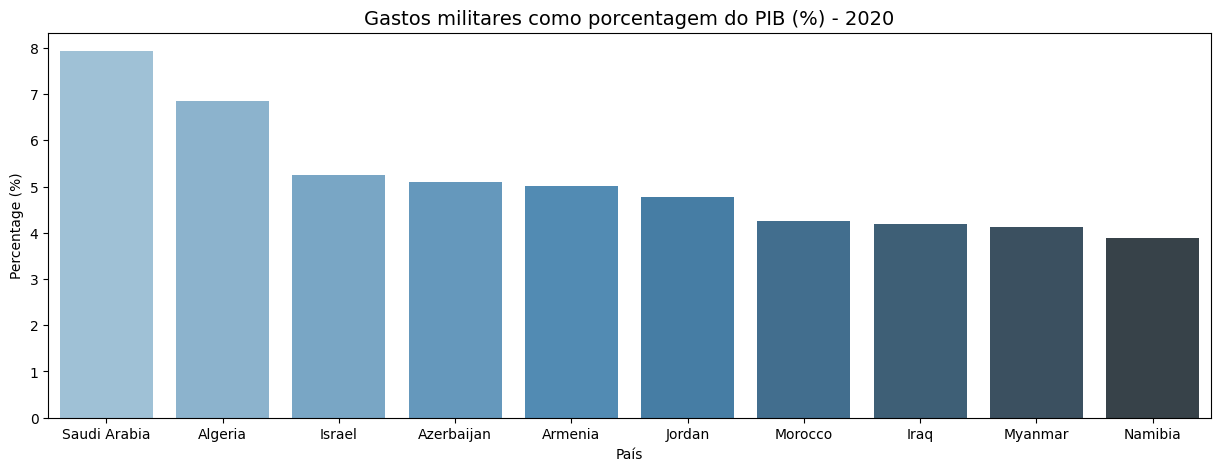

In [26]:
# Vamos filtrar os dados pelo último ano
df_filtered = df_eda.loc[(df_eda['Year'] == 2020)].sort_values(by=['percentage_military_expenditure'], ascending=False).head(10)

# Exclua os dados nulos da coluna que estamos analisando
df_filtered.dropna(subset=['percentage_military_expenditure'], inplace = True)

# Crie uma função do gráfico para reutilizar posteriormente
def barplot(figsize, title, data, x, y, xlabel, ylabel):
  # Trace o gráfico
  plt.figure(figsize=figsize)

  # Título
  plt.title(title, fontsize = 14)

  # Gráfico
  # Check if 'Entity Code' exists, if not, try 'Entity'
  if 'Entity Code' in data.columns:
    x_col = 'Entity Code'
  elif 'Entity' in data.columns:
    x_col = 'Entity'
  else:
    raise ValueError("Neither 'Entity Code' nor 'Entity' column found in DataFrame.")

  sns.barplot(data = data, x = x_col, y = y,
              ci = None, palette = "Blues_d")

  # Rótulo
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# Call barplot with the appropriate column name
barplot((15, 5), 'Gastos militares como porcentagem do PIB (%) - 2020', df_filtered,
        'Entity Code', 'percentage_military_expenditure',
        'País', 'Percentage (%)')

Com uma lista composta apenas por países asiáticos e africanos, estes países têm os maiores gastos militares em percentagem do PIB.

Estes países têm um PIB relativamente baixo, pelo que, ao extrair as despesas militares como percentagem do PIB, as suas percentagens são mais elevadas do que os países que têm despesas militares infinitamente mais elevadas em termos absolutos.

Enfim, é sempre uma surpresa não ver nenhum país norte-americano ou europeu nesta lista, concorda?

### 2. Qual é a despesa militar per capita?

Vamos analisar agora qual é o gasto militar per capita e comparar os dez países com maiores gastos como fizemos no tópico anterior.

In [27]:
# Crie uma nova coluna dividindo os gastos militares pela população
df_eda['military_expenditure_percapita'] = (df_eda.military_expenditure / df_eda.Population)
df_eda.head()

,Entity,Code,Year,military_expenditure,Population,GDP,percentage_military_expenditure,military_expenditure_percapita
0,Afghanistan,AFG,1970,5373185,11173654.0,1.748887e+09,0.307235,0.480880
1,Afghanistan,AFG,1973,6230685,12108963.0,1.733333e+09,0.359463,0.514551
2,Afghanistan,AFG,1974,6056124,12412960.0,2.155555e+09,0.280954,0.487887
3,Afghanistan,AFG,1975,6357396,12689164.0,2.366667e+09,0.268622,0.501010
4,Afghanistan,AFG,1976,8108200,12943093.0,2.555556e+09,0.317277,0.626450


Vejamos graficamente esses dados filtrados pelo último ano.

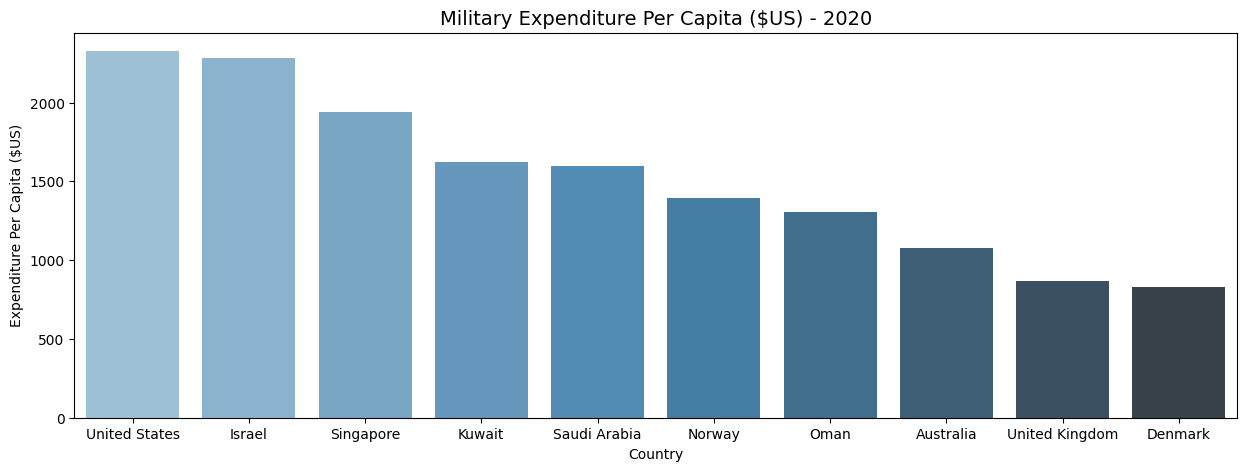

In [28]:
# Vamos filtrar os dados pelo último ano
df_filtered2 = df_eda.loc[(df_eda['Year'] == 2020) &
                          (df_eda['Entity'] != 'North America')].sort_values(by=['military_expenditure_percapita'], ascending=False).head(10)

# Exclua os dados nulos da coluna que estamos analisando
df_filtered2.dropna(subset=['military_expenditure_percapita'], inplace = True)

# Chame a função gráfica que criamos no tópico anterior
barplot((15, 5), 'Military Expenditure Per Capita ($US) - 2020', df_filtered2,
        'Entity', 'military_expenditure_percapita',
        'Country', 'Expenditure Per Capita ($US)')

Agora esta lista é mais diversificada e conta com algumas grandes potências mundiais, norte-americanas, europeias e asiáticas.

Veja como países como Israel e os Estados Unidos gastam quase o dobro per capita em comparação com os últimos países desta lista. Já imaginou para os países que nem estão nesta lista?

### 3. Quais foram os dez países com os maiores gastos de guerra no ano passado?

Agora vamos analisar algo mais simples, mas interessante, que é o gasto absoluto dos países.

Vamos seguir a mesma linha de raciocínio dos tópicos anteriores para poder comparar.

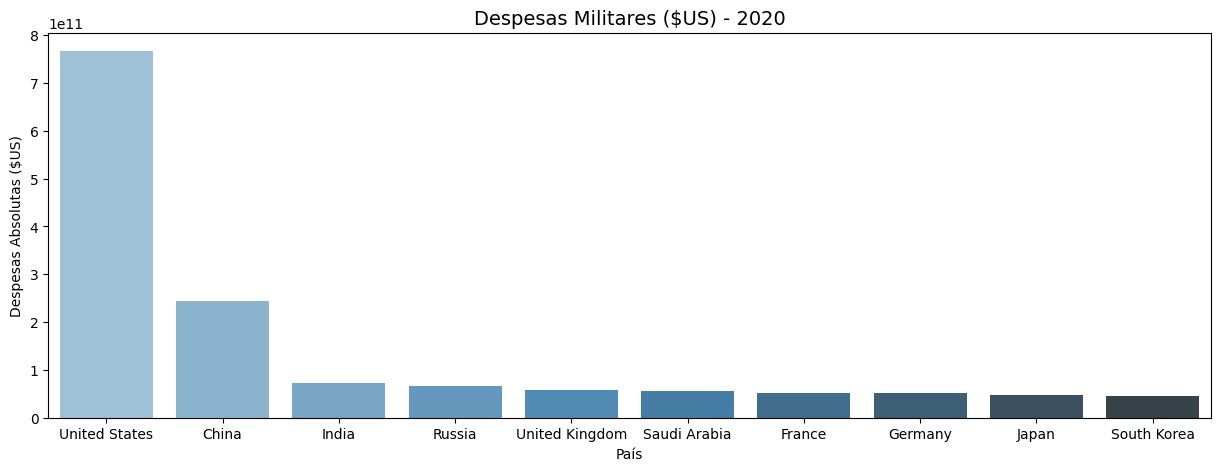

In [31]:
# Vamos filtrar os dados pelo último ano
df_filtered3 = df_eda.loc[(df_eda['Year'] == 2020) &
                          (df_eda['Code'] != 'OWID_WRL')].sort_values(by=['military_expenditure'], ascending=False).head(15)

# Exclua os dados nulos da coluna que estamos analisando
df_filtered3.dropna(subset=['military_expenditure', 'Code'], inplace = True)

# Chame a função gráfica que criamos no tópico anterior
# Changed 'despesas_militares' to 'military_expenditure' to match the column name in df_filtered3
barplot((15, 5), 'Despesas Militares ($US) - 2020', df_filtered3,
        'Entidade', 'military_expenditure', # Corrected column name
        'País', 'Despesas Absolutas ($US)')

Quão surpreendente é isso? Os gastos absolutos dos EUA superam em muito todos os outros países da lista, mas vemos a China se aproximando!

Agora, em vez de olharmos os valores apenas do último ano, vamos verificar os valores de todos os anos disponíveis no conjunto de dados.

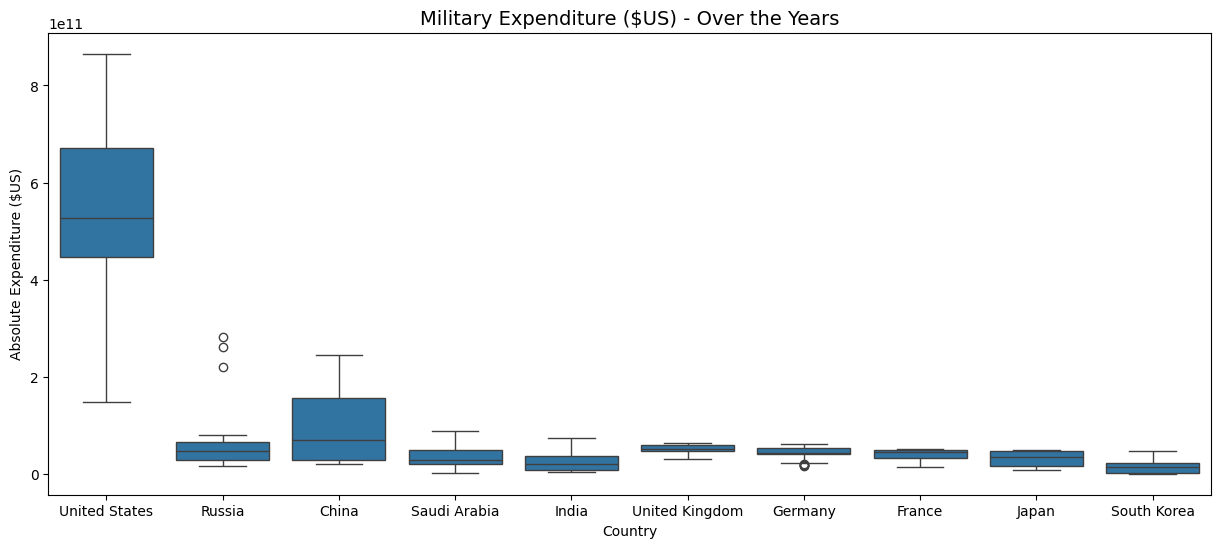

In [32]:
# Vamos fazer uma lista com os países acima
lst = [country for country in df_filtered3.Entity]

# Vamos filtrar os dados pelos países da lista
df_filtered4 = df_eda.loc[(df_eda['Entity'].isin(lst))].sort_values(by=['military_expenditure'], ascending=False)

# Exclua dados nulos da coluna que estamos analisando
df_filtered4.dropna(subset=['military_expenditure'], inplace = True)

# Crie uma função do gráfico para reutilizar posteriormente
def boxplot(figsize, title, data, x, y, xlabel, ylabel):

  # Trace o gráfico
  plt.figure(figsize=figsize)

  # Título
  plt.title(title, fontsize = 14)

  # Gráfico
  sns.boxplot(x = x, y = y, data = data)

  # Rótulo
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

boxplot((15, 6), 'Military Expenditure ($US) - Over the Years', df_filtered4,
        'Entity', 'military_expenditure',
        'Country', 'Absolute Expenditure ($US)')

Vemos que os Estados Unidos sempre investiram muito mais que outros países.

Uma coisa que me deixou curioso nesse gráfico são esses pontos extremos do boxplot em relação à Rússia, vamos investigar?

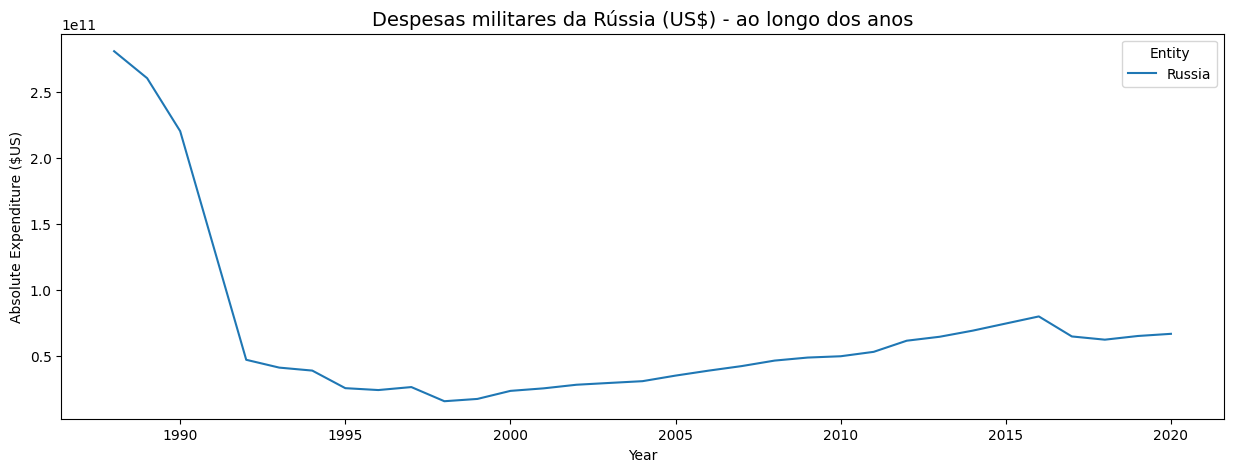

In [33]:
# Investigação de pontos extremos em relação à Rússia
df_filtered5 = df_eda.loc[(df_eda['Entity'] == 'Russia')]

# Exclua dados nulos da coluna que estamos analisando
df_filtered5.dropna(subset=['military_expenditure'], inplace = True)

# Crie uma função do gráfico para reutilizar posteriormente
def linegraph(figsize, title, data, x, y, xlabel, ylabel, hue):

  # Plot the graph
  plt.figure(figsize=figsize)

  # Title
  plt.title(title, fontsize = 14)

  # Graph
  sns.lineplot(data = data, x = x, y = y, hue=hue)

  # Label
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

linegraph((15, 5), 'Despesas militares da Rússia (US$) - ao longo dos anos', df_filtered5,
        'Year', 'military_expenditure',
        'Year', 'Absolute Expenditure ($US)', 'Entity')

Infelizmente não temos dados da Rússia antes de 1988. Poderia ser por causa do governo extremamente fechado da época da [União Soviética](https://en.wikipedia.org/wiki/Soviet_Union)?

Os dados começaram a surgir a partir de 1988, e talvez possam ser um indício da flexibilização do governo na época em que o presidente era [Mikhail Gorbachev](https://pt.wikipedia.org/wiki/Mikhail_Gorbatchov). Foi precisamente nesta altura do actual presidente Mikhail Gorbachev, que a URSS começou a declinar devido às suas tentativas de reformar o sistema. A URSS chegou ao fim em 1991. Faz sentido?

Enfim, esses valores extremos que vimos no boxplot da Rússia, vieram daí, em meados da década de 1980 a 1990, época em que a URSS ainda estava de pé e depois vemos um longo declínio depois que a URSS cessou existir .

Isto leva-nos a crer que a URSS investiu muito mais em gastos militares e que imagino também que o país neste momento de turbulência e transição passou por fortes crises financeiras. Daí esta queda repentina.

###4. Houve valores extremos nos gastos militares dos países nos anos em que houve guerras?
Sabemos que houve algumas guerras na história e que seria plausível que os países aumentassem os seus gastos militares nestes períodos. Vamos ver se os dados nos dizem isso?

In [34]:
# Vamos verificar qual foi o primeiro ano que tivemos dados
print(df_eda.Year.min())

1949


Entre esse período de 1949 a 2020, não tivemos nenhuma guerra mundial, porque a segunda guerra terminou em 1945, mas entre 1947 e 1991 tivemos a guerra fria, que foi um conflito longo e talvez não seja o melhor para tirar conclusões para o que estamos querendo naquele tópico específico.

De qualquer forma, vamos traçar um gráfico entre a Rússia e os Estados Unidos para ver se conseguimos alguma evidência.

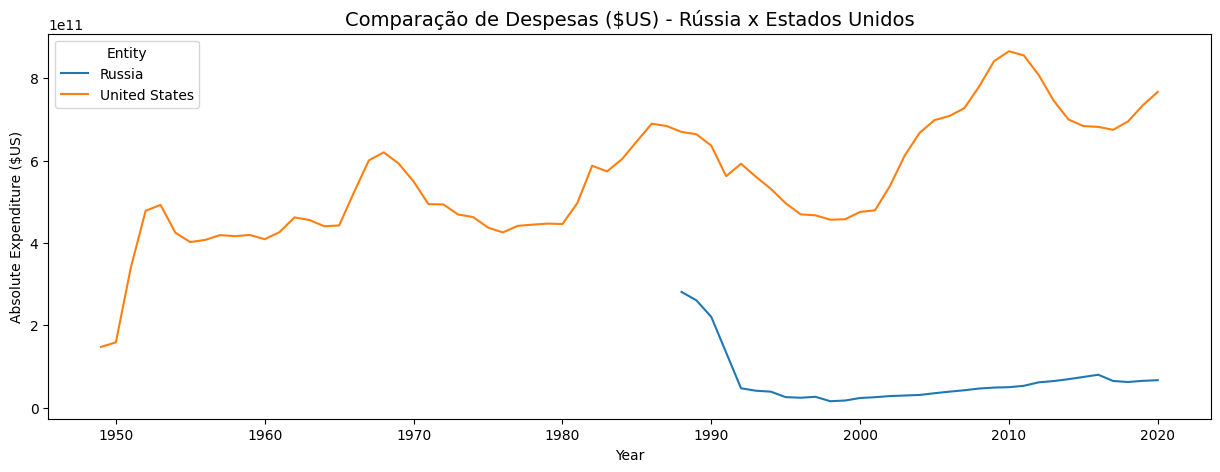

In [35]:
# Investigação de pontos extremos em relação à Rússia
df_filtered6 = df_eda.loc[(df_eda['Entity'] == 'Russia') |
                          (df_eda['Entity'] == 'United States')]

# Exclua os dados nulos da coluna que estamos analisando
df_filtered6.dropna(subset=['military_expenditure'], inplace = True)

# gráfico entre a Rússia e os Estados Unidos
linegraph((15, 5), 'Comparação de Despesas ($US) - Rússia x Estados Unidos', df_filtered6,
        'Year', 'military_expenditure',
        'Year', 'Absolute Expenditure ($US)', 'Entity')

Tal como pensamos, é difícil afirmar este padrão que tentamos captar através deste exemplo da guerra fria. O que podemos dizer é que os Estados Unidos gastam muito mais dinheiro do que a Rússia, de acordo com os dados que temos.

Um grande conflito que tivemos no século XXI foi entre os Estados Unidos e grupos extremistas baseados no Afeganistão e no Paquistão. Esse conflito durou cerca de 2001 a 2011, vamos conferir graficamente.

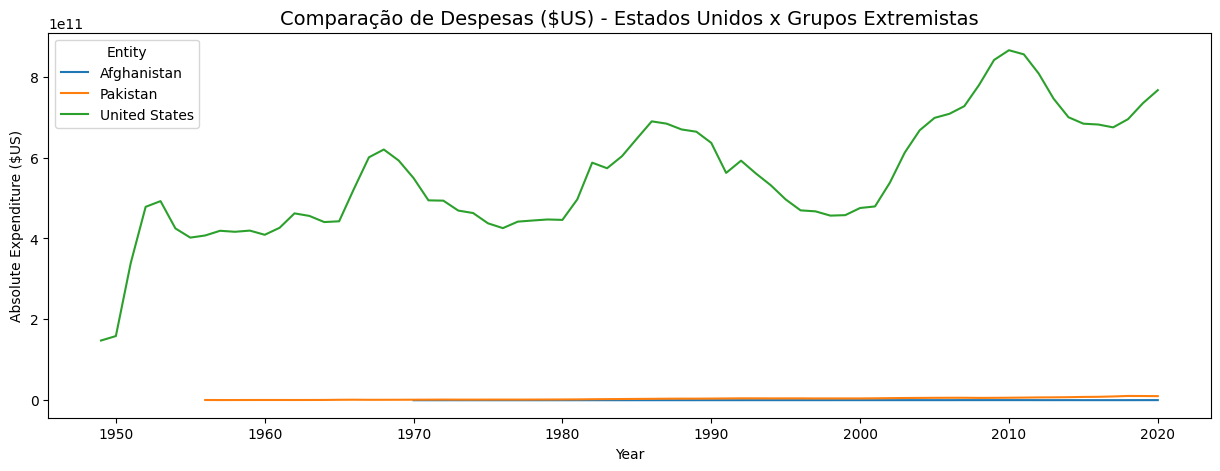

In [36]:
# Investigação de pontos extremos em relação à Rússia
df_filtered7 = df_eda.loc[(df_eda['Entity'] == 'United States') |
                          (df_eda['Entity'] == 'Pakistan') |
                          (df_eda['Entity'] == 'Afghanistan')]

# Exclua os dados nulos da coluna que estamos analisando
df_filtered7.dropna(subset=['military_expenditure'], inplace = True)

# gráfico entre a Rússia e os Estados Unidos
linegraph((15, 5), 'Comparação de Despesas ($US) - Estados Unidos x Grupos Extremistas', df_filtered7,
        'Year', 'military_expenditure',
        'Year', 'Absolute Expenditure ($US)', 'Entity')

Mais uma vez, não conseguimos tirar conclusões significativas. Vemos até uma possível tendência de aumento dos gastos dos EUA neste período, mas não podemos dizer o mesmo dos outros dois países. Novamente, o que podemos ver é a enorme diferença entre o poder militar dos Estados Unidos e dos outros dois.

### 5. Qual é a correlação dos gastos militares com o PIB e a população?

Por fim, vamos verificar o grau de correlação entre as variáveis ​​apresentadas durante este projeto, que foram: gasto militar, população, PIB e as outras duas que criamos (percentual de gasto militar e gasto militar per capita).

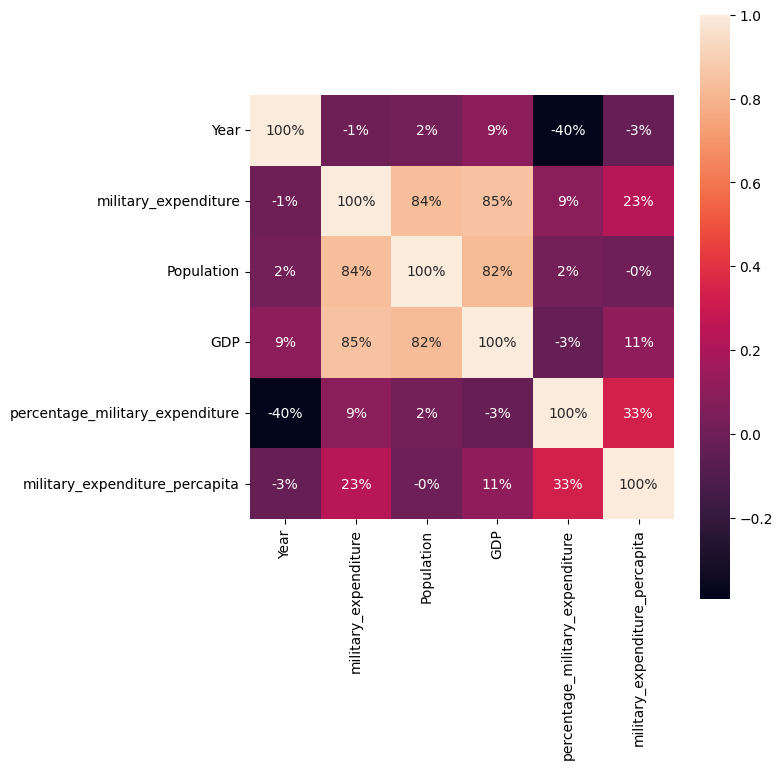

In [38]:
# Coeficiente de correlação entre as variáveis ​​deste problema
# Select only numerical columns for correlation calculation
numerical_df = df_eda.select_dtypes(include=['number'])

corr = numerical_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

Para contextualização, o coeficiente de correlação varia de -1 a 1 e duas variáveis ​​são correlacionadas positivamente se uma variação em uma delas estiver associada a uma variação na outra na mesma direção. Uma correlação é negativa se uma mudança positiva em uma das variáveis ​​estiver associada a uma mudança negativa na outra. Se for 0, significa que as variáveis ​​não possuem associação significativa entre si.

Como podemos ver, a população e o PIB têm correlações muito elevadas com os gastos militares de um país. Vemos também que o PIB e a população têm uma alta correlação entre si, mas isso era de se esperar, certo?

Vamos ver isso em um gráfico de dispersão!

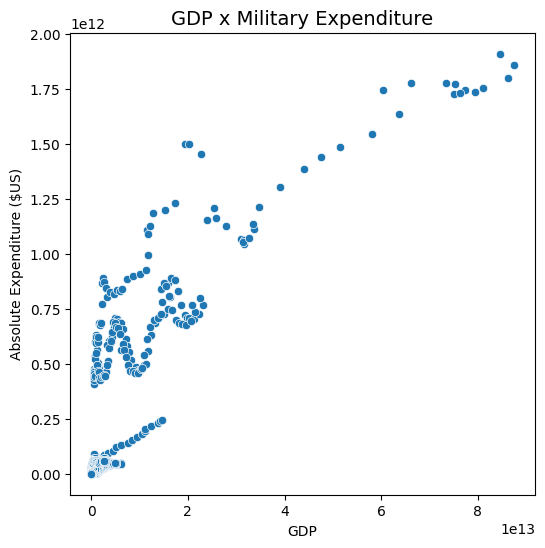

In [39]:
# Crie uma função do gráfico para reutilizar posteriormente
def scatter(figsize, title, data, x, y, xlabel, ylabel):

  # Plot the graph
  plt.figure(figsize=figsize)

  # Title
  plt.title(title, fontsize = 14)

  # Graph
  sns.scatterplot(data = data, x = x, y = y)

  # Label
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# graph between GDP and military expenditure
scatter((6, 6), 'GDP x Military Expenditure', df_eda,
        'GDP', 'military_expenditure',
        'GDP', 'Absolute Expenditure ($US)')

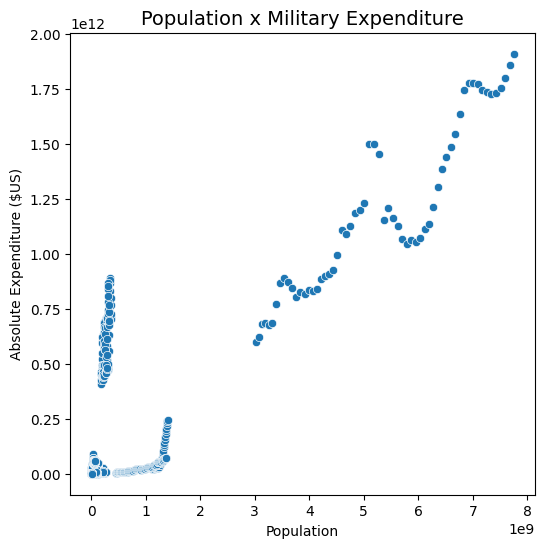

In [40]:
# gráfico entre população e despesas militares
scatter((6, 6), 'Population x Military Expenditure', df_eda,
        'Population', 'military_expenditure',
        'Population', 'Absolute Expenditure ($US)')

# Conclusão

Através desta análise pudemos explorar algumas situações em que os dados de despesas militares, população e PIB entram para nos ajudar a obter insights para uma melhor tomada de decisão numa empresa ou mesmo num governo.
